In [1]:
import numpy as np 
import roboticstoolbox as rtb 
from spatialmath import * 
from spatialmath.base import *
import spatialmath.base.symbolic as sym
import sympy
from sympy import Matrix, symbols, cos, sin
from solutions import generate_wrench 
from IPython.display import display, Latex 
import matplotlib.pyplot as plt


In [2]:
a1,a2,a3,a4 = sym.symbol("a1, a2, a3, a4")
b1,b2,b3,b4 = sym.symbol("b1, b2, b3, b4")
l = sym.symbol("l")
mu = sym.symbol("mu")
km = sym.symbol("Km")

R_z = rotx(np.pi)
R1_prop = roty(a1) @ rotx(b1)
R2_prop = roty(a2) @ rotx(b2)
R3_prop = roty(a3) @ rotx(b3)
R4_prop = roty(a4) @ rotx(b4)
 
T = np.array([0,0,-mu])
fb1 = R1_prop.dot(T)
fb2 = R2_prop.dot(T)
fb3 = R3_prop.dot(T)
fb4 = R4_prop.dot(T)

forces_body = np.array([fb1, fb2,fb3, fb4])
print(f"This is the final body forces array: \n {np.array2string(forces_body, separator=',')}")

This is the final body forces array: 
 [[-mu*sin(a1)*cos(b1),mu*sin(b1),-mu*cos(a1)*cos(b1)],
 [-mu*sin(a2)*cos(b2),mu*sin(b2),-mu*cos(a2)*cos(b2)],
 [-mu*sin(a3)*cos(b3),mu*sin(b3),-mu*cos(a3)*cos(b3)],
 [-mu*sin(a4)*cos(b4),mu*sin(b4),-mu*cos(a4)*cos(b4)]]


In [3]:

torques = np.cross(forces_body, np.array([[l, l,0],[-l, -l, 0], [ l, -l, 0], [-l, l, 0]])).T
print(np.array2string(torques, separator=","))

[[l*mu*cos(a1)*cos(b1),-l*mu*cos(a2)*cos(b2),-l*mu*cos(a3)*cos(b3),
  l*mu*cos(a4)*cos(b4)],
 [-l*mu*cos(a1)*cos(b1),l*mu*cos(a2)*cos(b2),-l*mu*cos(a3)*cos(b3),
  l*mu*cos(a4)*cos(b4)],
 [-l*mu*sin(a1)*cos(b1) - l*mu*sin(b1),
  l*mu*sin(a2)*cos(b2) + l*mu*sin(b2),l*mu*sin(a3)*cos(b3) - l*mu*sin(b3),
  -l*mu*sin(a4)*cos(b4) + l*mu*sin(b4)]]


In [4]:
drag_torques = R_z.dot(np.array([[0,0, -km],[0, 0,-km], [0,0,km], [0,0,km]]).T)
drag_torques[1] = 0
drag1 = R1_prop.dot(drag_torques[:,0])
drag2 = R2_prop.dot(drag_torques[:,1])
drag3 = R3_prop.dot(drag_torques[:,2])
drag4 = R4_prop.dot(drag_torques[:,3])

drag_torques_body = np.array([drag1, drag2, drag3, drag4]).T
final_torques = torques+drag_torques_body
print(f"This is the final torques array for the quadcopter: \n{np.array2string(torques + drag_torques_body, separator=',')}")

This is the final torques array for the quadcopter: 
[[1.0*Km*sin(a1)*cos(b1) + l*mu*cos(a1)*cos(b1),
  1.0*Km*sin(a2)*cos(b2) - l*mu*cos(a2)*cos(b2),
  -1.0*Km*sin(a3)*cos(b3) - l*mu*cos(a3)*cos(b3),
  -1.0*Km*sin(a4)*cos(b4) + l*mu*cos(a4)*cos(b4)],
 [-1.0*Km*sin(b1) - l*mu*cos(a1)*cos(b1),
  -1.0*Km*sin(b2) + l*mu*cos(a2)*cos(b2),
  1.0*Km*sin(b3) - l*mu*cos(a3)*cos(b3),
  1.0*Km*sin(b4) + l*mu*cos(a4)*cos(b4)],
 [1.0*Km*cos(a1)*cos(b1) - l*mu*sin(a1)*cos(b1) - l*mu*sin(b1),
  1.0*Km*cos(a2)*cos(b2) + l*mu*sin(a2)*cos(b2) + l*mu*sin(b2),
  -1.0*Km*cos(a3)*cos(b3) + l*mu*sin(a3)*cos(b3) - l*mu*sin(b3),
  -1.0*Km*cos(a4)*cos(b4) - l*mu*sin(a4)*cos(b4) + l*mu*sin(b4)]]


Text(0.4, 0.4, '$\\mathtt{\\text{[-mu*w1**2*sin(a1)*cos(b1) - mu*w2**2*sin(a2)*cos(b2) - mu*w3**2*sin(a3)*cos(b3) - mu*w4**2*sin(a4)*cos(b4)\n mu*w1**2*sin(b1) + mu*w2**2*sin(b2) + mu*w3**2*sin(b3) + mu*w4**2*sin(b4)\n -mu*w1**2*cos(a1)*cos(b1) - mu*w2**2*cos(a2)*cos(b2) - mu*w3**2*cos(a3)*cos(b3) - mu*w4**2*cos(a4)*cos(b4)\n w1**2*(1.0*Km*sin(a1)*cos(b1) + l*mu*cos(a1)*cos(b1)) + w2**2*(1.0*Km*sin(a2)*cos(b2) - l*mu*cos(a2)*cos(b2)) + w3**2*(-1.0*Km*sin(a3)*cos(b3) - l*mu*cos(a3)*cos(b3)) + w4**2*(-1.0*Km*sin(a4)*cos(b4) + l*mu*cos(a4)*cos(b4))\n w1**2*(-1.0*Km*sin(b1) - l*mu*cos(a1)*cos(b1)) + w2**2*(-1.0*Km*sin(b2) + l*mu*cos(a2)*cos(b2)) + w3**2*(1.0*Km*sin(b3) - l*mu*cos(a3)*cos(b3)) + w4**2*(1.0*Km*sin(b4) + l*mu*cos(a4)*cos(b4))\n w1**2*(1.0*Km*cos(a1)*cos(b1) - l*mu*sin(a1)*cos(b1) - l*mu*sin(b1)) + w2**2*(1.0*Km*cos(a2)*cos(b2) + l*mu*sin(a2)*cos(b2) + l*mu*sin(b2)) + w3**2*(-1.0*Km*cos(a3)*cos(b3) + l*mu*sin(a3)*cos(b3) - l*mu*sin(b3)) + w4**2*(-1.0*Km*cos(a4)*cos(b4) - l*mu*

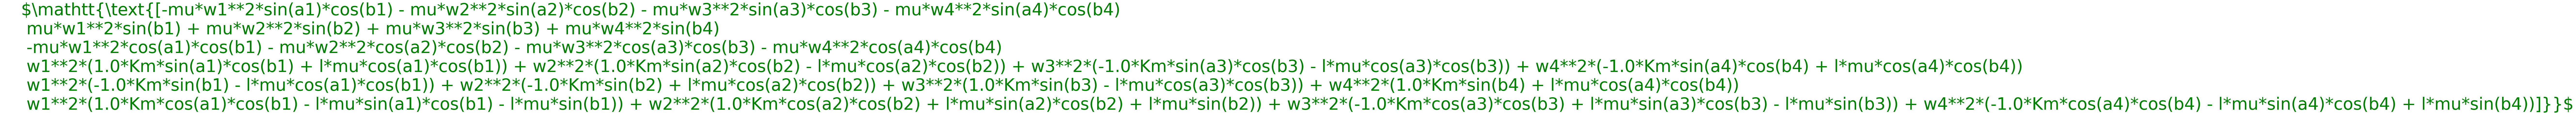

In [5]:
w1, w2, w3, w4 = sym.symbol("w1, w2, w3, w4")
ang_vel = np.array([w1**2, w2**2, w3**2, w4**2])
alloc = np.concatenate((forces_body.T, final_torques), axis=0)
a = ((sympy.latex((alloc.dot(ang_vel)))))
ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.text(0.4,0.4,'$%s$' %a,size=50,color="green")


In [94]:

a1,b1,w1,a1,b2,w2,a3,b3,w3,a4,b4,w4,mu,km = sympy.symbols("a1,b1,w1,a1,b2,w2,a3,b3,w3,a4,b4,w4, mu, km")
alloc2 = Matrix([-mu*w1**2*sin(a1)*cos(b1) - mu*w2**2*sin(a2)*cos(b2) - mu*w3**2*sin(a3)*cos(b3) - mu*w4**2*sin(a4)*cos(b4),
 mu*w1**2*sin(b1) + mu*w2**2*sin(b2) + mu*w3**2*sin(b3) + mu*w4**2*sin(b4),
 -mu*w1**2*cos(a1)*cos(b1) - mu*w2**2*cos(a2)*cos(b2) - mu*w3**2*cos(a3)*cos(b3) - mu*w4**2*cos(a4)*cos(b4),
 w1**2*(1.0*km*sin(a1)*cos(b1) + l*mu*cos(a1)*cos(b1)) + w2**2*(1.0*km*sin(a2)*cos(b2) - l*mu*cos(a2)*cos(b2)) + w3**2*(-1.0*km*sin(a3)*cos(b3) - l*mu*cos(a3)*cos(b3)) + w4**2*(-1.0*km*sin(a4)*cos(b4) + l*mu*cos(a4)*cos(b4)),
 w1**2*(-1.0*km*sin(b1) - l*mu*cos(a1)*cos(b1)) + w2**2*(-1.0*km*sin(b2) + l*mu*cos(a2)*cos(b2)) + w3**2*(1.0*km*sin(b3) - l*mu*cos(a3)*cos(b3)) + w4**2*(1.0*km*sin(b4) + l*mu*cos(a4)*cos(b4)),
 w1**2*(1.0*km*cos(a1)*cos(b1) - l*mu*sin(a1)*cos(b1) - l*mu*sin(b1)) + w2**2*(1.0*km*cos(a2)*cos(b2) + l*mu*sin(a2)*cos(b2) + l*mu*sin(b2)) + w3**2*(-1.0*km*cos(a3)*cos(b3) + l*mu*sin(a3)*cos(b3) - l*mu*sin(b3)) + w4**2*(-1.0*km*cos(a4)*cos(b4) - l*mu*sin(a4)*cos(b4) + l*mu*sin(b4))])
y = Matrix([a1,b1,w1,a1,b2,w2,a3,b3,w3,a4,b4,w4])
gradh = alloc2.jacobian(y)
gamma_p = 0.1
gamma_j = 0.1
gradh = gradh.subs([(a1, np.pi/2),(b1, np.pi/2),(w1, 2000),(a2, np.pi/2),(b2, np.pi/2),
               (w2, 2000),(a3, np.pi/2),(b3, np.pi/2),(w3, 2000),(a4, np.pi/2),
               (b4, np.pi/2),(w4, 2000), (km ,  0.01), (mu, 0.1), (l,  0.13)])
alloc = alloc2.subs([(a1, np.pi/2),(b1, np.pi/2),(w1, 2000),(a2, np.pi/2),(b2, np.pi/2),
               (w2, 2000),(a3, np.pi/2),(b3, np.pi/2),(w3, 2000),(a4, np.pi/2),
               (b4, np.pi/2),(w4, 2000), (km ,  0.01), (mu, 0.1), (l,  0.13)])
u_y = (gamma_p * gradh * ((gradh.T) * (gradh)).pinv()).T * (Matrix([2, 2.5, (1.94*9.81), 0.1, 0.1, 0.1]) - alloc)
mu1, mu2,mu3, wm, da, db, dw= sympy.symbols("mu1, mu2, mu3, wm, da, db, dw")
print(u_y)
gradj = Matrix([(mu3 * (a1/da)**2),(mu2 * (b1/db)**2),(mu1 * ((w1 - wm)/dw)**2),(mu3 * (a2/da)**2),(mu2 * (b2/db)**2),(mu1 * ((w2 - wm)/dw)**2),(mu3 * (a3/da)**2),(mu2 * (b3/db)**2),(mu1 * ((w3 - wm)/dw)**2),(mu3 * (a4/da)**2),(mu2 * (b4/db)**2),(mu1 * ((w4 - wm)/dw)**2)])
gradh_ortho = sympy.eye(12) - (gradh * ((gradh.T) * gradh).pinv() * (gradh.T))
u_j = gamma_j * gradh_ortho * gradj


ShapeError: Matrix size mismatch: (12, 12) + (6, 6)

In [ ]:
print()